[20.32, 22.86, 25.4, 27.94, 30.48, 33.02, 35.56]
[0.5722543352601155, 0.7638095238095237, 0.9201520912547528, 0.8438095238095238, 0.6311787072243347, 0.5393474088291746, 0.33333333333333337]
[ 0.84061423 26.3570824  11.40663524]
[[ 0.00159818  0.00488992 -0.01929082]
 [ 0.00488992  0.25776799 -0.28367998]
 [-0.01929082 -0.28367998  0.80631502]]
[0.015, 0.037, 0.131, 0.062, 0.02, 0.013, 0.006]


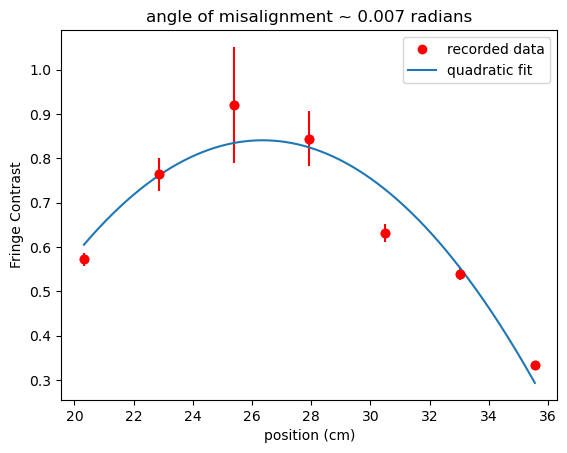

In [56]:


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def quadratic_fit(x, Fmax, x0, l_coh):
    return Fmax*(1-(((x-x0)/l_coh)**2))

# feed x_data in inches here
x_data = [8,9,10,11,12,13,14]
x_data = [data*2.54 for data in x_data]
print(x_data)

#Feed voltages here
v_max = [4.08,4.63,5.05,4.84,4.29,4.01,3.46]
v_min = [1.11,0.620,0.210,0.410,0.970,1.20,1.73]

f_c = [(vmax - vmin)/(vmax + vmin) for vmax,vmin  in zip(v_max,v_min)]
print(f_c)

f_c_error = [round(0.03/vmin*fc,3) for vmin,fc in zip(v_min,f_c)]
plt.plot(x_data,f_c,'ro', label = 'recorded data')
plt.errorbar(x_data, f_c, yerr=f_c_error, fmt='ro')

popt, pcov = curve_fit(quadratic_fit,x_data,f_c,[1,26,20])
print(popt)
print(pcov)
x_data_fit = np.arange(np.min(x_data),np.max(x_data),0.01)
plt.xlabel("position (cm)")
plt.ylabel("Fringe Contrast")
plt.title("angle of misalignment ~ 0.007 radians")

print(f_c_error)

plt.plot(x_data_fit,quadratic_fit(x_data_fit,*popt), label = 'quadratic fit')
plt.legend()

[20.32, 22.86, 25.4, 27.94, 30.48, 33.02]
[0.467, 0.658, 0.919, 0.648, 0.44, 0.147]
[0.014, 0.029, 0.175, 0.029, 0.012, 0.003]
[ 0.78721096 25.4756797   8.13656616]
[[ 0.00348544  0.0063316  -0.01767832]
 [ 0.0063316   0.20649234 -0.17341355]
 [-0.01767832 -0.17341355  0.42635892]]


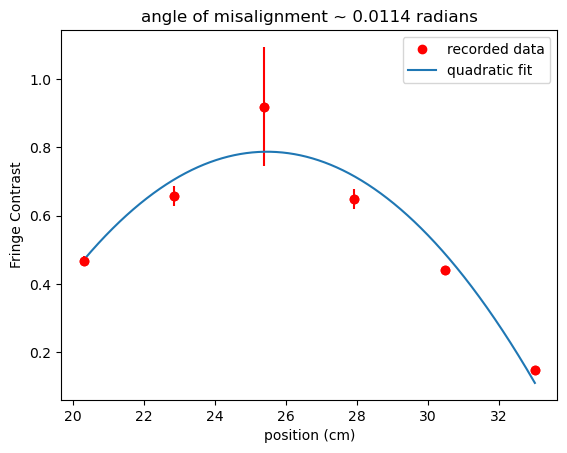

In [59]:
# feed x_data in inches here
x_data = [8,9,10,11,12,13]
x_data = [data*2.54 for data in x_data]
print(x_data)

#Feed voltages here
v_max = [3.80,4.36,4.98,4.22,3.73,2.97]
v_min = [1.38,0.9,0.210,0.90,1.45,2.21]

f_c = [round((vmax - vmin)/(vmax + vmin),3) for vmax,vmin  in zip(v_max,v_min)]

f_c_error = [round(0.04/vmin*fc,3) for vmin,fc in zip(v_min,f_c)]
print(f_c)
print(f_c_error)

plt.plot(x_data,f_c,'ro', label = 'recorded data')
plt.errorbar(x_data,f_c,f_c_error,fmt='ro')
plt.xlabel("position (cm)")
plt.ylabel("Fringe Contrast")
plt.title("angle of misalignment ~ 0.0114 radians")
popt, pcov = curve_fit(quadratic_fit,x_data,f_c,[1,26,20])
print(popt)
print(pcov)
x_data_fit = np.arange(np.min(x_data),np.max(x_data),0.01)
plt.plot(x_data_fit,quadratic_fit(x_data_fit,*popt), label = 'quadratic fit')
plt.legend()

[0.8979504552034038, 0.6517582297140558]
[-1265.41582216    21.94707355]
[[inf inf]
 [inf inf]]
3.997367829999998


/home/amanmehta/tools/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


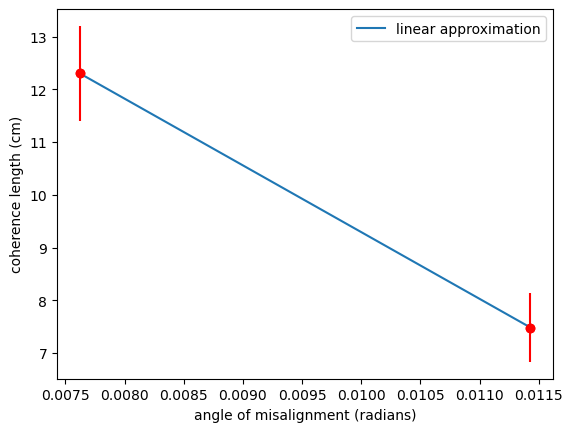

In [61]:
def linear_fit(x,m,c):
    return m*np.float64(x) + c

x_data = [0.00762001524003048006096012192024,0.01143002286004572009144018288037]
y_data = [11.40663524,8.1351]

plt.plot(x_data,y_data,'ro')
err = [np.sqrt(0.80631502) ,np.sqrt(0.42478879)]
print(err)
popt,pcov = curve_fit(linear_fit,x_data,y_data, [-10, 15], sigma=err)
print(popt)
print(pcov)

plt.xlabel("angle of misalignment (radians)")
plt.ylabel("coherence length (cm)")
plt.plot(x_data,linear_fit(x_data,*popt), label = "linear approximation")
plt.errorbar(x_data,y_data,yerr=err, fmt='ro')
plt.legend()

[0.7536945812807881, 0.24882629107981225, 0.31249999999999994, 0.24586549062844545, 0.08680947012401358]


Text(0.5, 1.0, 'Fringe contrast vs different position of mirror')

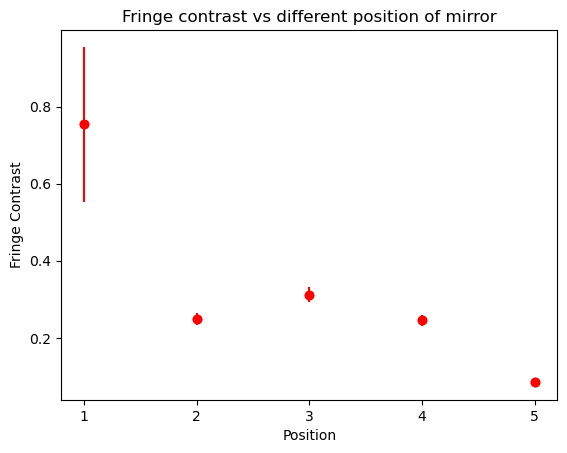

In [45]:
v1 = [0.75, 3.20, 3.08, 3.42, 4.82]
v2 = [5.34, 5.32, 5.88, 5.65, 4.05]

f_c = [np.abs((vmax - vmin)/(vmax + vmin)) for vmax,vmin  in zip(v2,v1)]
print(f_c)

f_c_error = [0.2/vmin*fc for vmin,fc in zip(v1,f_c)]


point = ['1','2','3','4','5']

plt.plot(point, f_c, 'ro')
plt.errorbar(point, f_c, yerr=f_c_error, fmt='ro')
plt.xlabel("Position")
plt.ylabel("Fringe Contrast")
plt.title("Fringe contrast vs different position of mirror")